In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import *
import torch

In [2]:
from Code.unsupervised_methods.dagmm_self.model import DAGMM
from Code.unsupervised_methods.dagmm_self.compression_network import CompressionNetwork
from Code.unsupervised_methods.dagmm_self.estimation_network import EstimationNetwork
from Code.unsupervised_methods.dagmm_self.gmm import GMM, Mixture

In [3]:
model = "dagmm"
dataset = "vehicle_claims"
features = "numerical"

In [4]:
def cos_sim(X, dec):
    dot_prod = torch.sum(X*dec, dim=1)
    dist_x1 = torch.norm(X, p=2, dim=1)  # dim [batch_size]
    dist_x2 = torch.norm(dec, p=2, dim=1)  # dim [batch_size]
    cos_sim =  dot_prod / torch.max(dist_x1*dist_x2)
    return cos_sim

In [5]:
def euc_dis(X, dec):
    num = torch.norm(X - dec, p=2, dim=1)  # dim [batch_size]
    denom = torch.norm(X, p=2, dim=1)  # dim [batch_size]
    euc_dis =  num / torch.max(denom)
    return euc_dis

In [6]:
def eval(data, model, dataset, features):
    save_path = (os.path.join("model", model+"_"+dataset+"_"+features))
    compression = CompressionNetwork(data.shape[1])
    estimation = EstimationNetwork()
    gmm = GMM(2,3)
    mix = Mixture(3)
    net = DAGMM(compression, estimation, gmm)
    net = torch.load(save_path)
    out = net.eval()
    enc = compression.encode(data)
    dec = compression.decode(enc)
    cs = cos_sim(data, dec)
    ed = euc_dis(data, dec)
    return enc, cs, ed

In [7]:
def plot3d(data, model, dataset, features, Y):
    e, c, d = eval(data, model, dataset, features)
    e = e.detach().numpy()
    c = c.detach().numpy()
    d = d.detach().numpy()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(e,c, d, c=Y)
    ax.set_xlabel('Encoded')
    ax.set_ylabel('Euclidean')
    ax.set_zlabel('Cosine')
    plt.show()
    

In [8]:
data = load_data('data/vehicle_claims_labeled.csv')
categorical_cols = ['Maker', ' Genmodel', 'Color', 'Bodytype', 'Engin_size', 'Gearbox', 'Fuel_type',
                        'Seat_num', 'Door_num', 'issue', 'issue_id', 'repair_complexity']
cols_to_remove = [' Genmodel_ID', 'Adv_year', 'Adv_month', 'Adv_day', 'breakdown_date', 'repair_date', 'category_anomaly']
X = remove_cols(data,cols_to_remove)
Y = get_labels(data, "vehicle_claims")

In [9]:
X = remove_cols(X, categorical_cols)
X = torch.tensor(X.values.astype(np.float32))

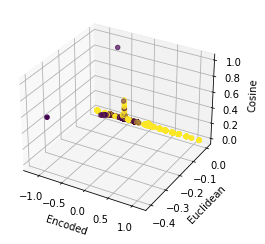

In [13]:
plot3d(X, model, dataset, features, Y)

In [14]:
data = load_data('data/vehicle_claims_labeled.csv')
categorical_cols = ['Maker', ' Genmodel', 'Color', 'Bodytype', 'Engin_size', 'Gearbox', 'Fuel_type',
                        'Seat_num', 'Door_num', 'issue', 'issue_id', 'repair_complexity']

In [15]:
X = remove_cols(data,cols_to_remove)
Y = get_labels(data, "vehicle_claims")

In [16]:
X = label_encoding(X, categorical_cols)

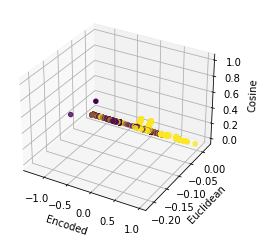

In [18]:
X = torch.tensor(X.values.astype(np.float32))
plot3d(X, model, dataset, features, Y)